In [32]:
import numpy as np
import matplotlib.pyplot as plt

The temperature in the room $c_t$ is controlled by a heater. It changes the temperature according to the following rule: $0.1*cos(\alpha t)*u_t^2$. Unfortunately, it is malfunctioning and the controls $u_t = \overline{u}_t + \eta_t$ it exerts are slightly off where $\eta_t \sim \mathcal{N}(0, M)$. Likewise, the temperature deviates from time to time due to the presence of air flows that is modelled by the noise $\epsilon_t \sim \mathcal{N}(0, N)$. The estimated temperature at the moment of time $t$ can be written as follows:

$$c_t = g(c_{t-1}, u_t) = c_{t-1} + \Delta t * 0.1 * cos(\alpha t) * u_t^2 + \epsilon_t$$

Let $\alpha=0.1$, $c_0 = 18$, $\Sigma_0=0$, $\Delta t=0.3$, $M=3$ and $N=0.2$.

In [33]:
alpha = 0.1

c_0 = 18
sigma_0 = 0

dt = 0.3

n = 400

M = 3
N = 0.2

In [34]:
np.random.seed(904)

t = np.arange(n)

# Actual executed commands: mean_u + eta
u = np.random.randint(1, 4, (len(t) - 1)).astype(np.float32)
# Commands that were intended to be executed: mean_u
mean_u = u - np.random.randn(len(t) - 1) * np.sqrt(M)

In [35]:
# Actual temperature
c = [c_0]

for t_t, u_t in zip(t[1:], u):
    c_t = c[-1] + dt * 0.1 * np.cos(alpha * t_t) * u_t**2
    c.append(c_t)

c = np.array(c)

## Task 1
Calculate $G_t=\frac{dg(c_{t-1}, u_t)}{dc_{t-1}}\Big|_{\mu_{t-1}}$ and $V_t=\frac{dg(c_{t-1}, u_t)}{du_{t}}\Big|_{\overline{u}_t}$ and perform mean and covariance propagation. Plot the guess on mean values and covariance estimates as 1-sigma interval for each step.


In [36]:
mean_c = [c_0]
cov_c = [sigma_0]

In [37]:
for t_t, mu_t in zip(t[1:], mean_u):
    v_t = 0.2 * dt * np.cos(alpha * t_t) * mu_t
    mean_c_t = mean_c[-1] + dt * 0.1 * np.cos(alpha * t_t) + mu_t ** 2
    cov_c_t = cov_c[-1] + v_t ** 2 * M + N
    mean_c.append(mean_c_t)
    cov_c.append(cov_c_t)
mean_c = np.array(mean_c)
sigma1_c = np.array(cov_c)

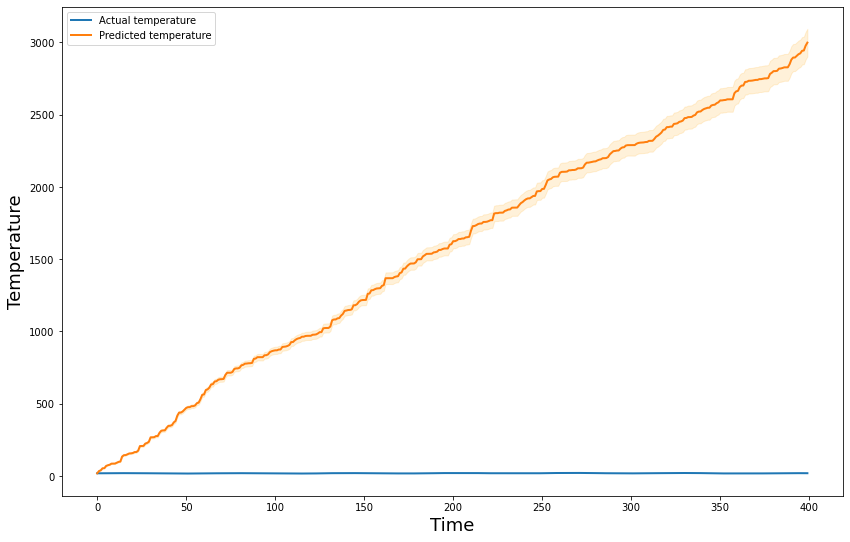

In [38]:
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Temperature', fontsize=18)

ax.plot(t, c, linewidth=2, label='Actual temperature')
ax.plot(t, mean_c, linewidth=2, label='Predicted temperature')
ax.fill_between(t, (mean_c - sigma1_c), (mean_c + sigma1_c), color='orange', alpha=.15)

plt.legend()

Now, lets assume that we can measure the temperature in the room by using a sensor. The sensor procudes the following observation $z_t = h(x_t) = 2\sqrt{x_t} + \nu_t$ where $\nu \sim \mathcal{N}(0, R)$ and $R = 0.1$.

In [39]:
np.random.seed(1)

R = 0.1

z_noise = np.random.randn(len(t) - 1) * np.sqrt(R)
z = 2 * np.sqrt(c[1:]) + z_noise

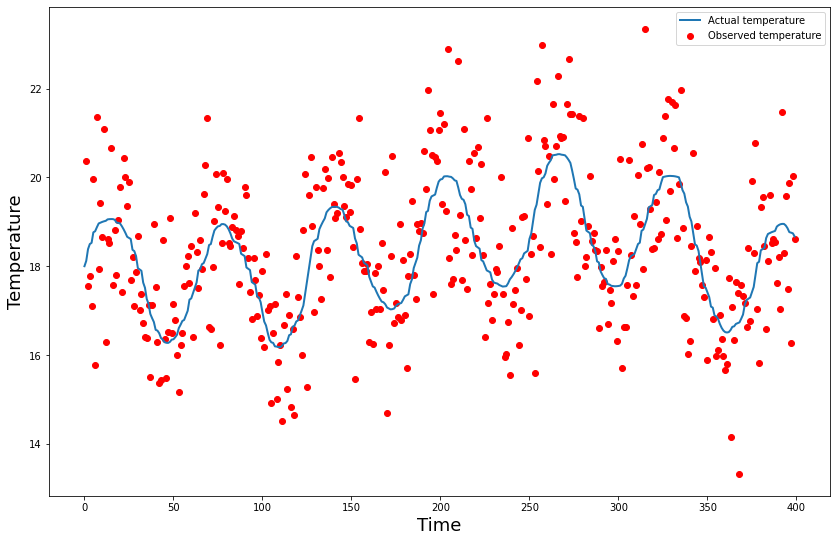

In [40]:
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Temperature', fontsize=18)

ax.plot(t, c, linewidth=2, label='Actual temperature')
ax.scatter(t[1:], z ** 2 / 4, color='red', label='Observed temperature')

plt.legend()


## Task 2

Calculate $H_t=\frac{dh(x_t)}{dx_t}\Big|_{\mu_t}$ and using the implementation of prediction step from the previous taks finish the implementation of EKF by implementing the update step. Plot mean and covariance 1-sigma and 3-sigma intervals outputed by the algorithm on each step.

In [41]:
mean_c = [c_0]
cov_c = [sigma_0]

In [42]:
for t_t, mu_t in zip(t[1:], mean_u):
    v_t = 0.2 * dt * np.cos(alpha * t_t) * mu_t
    mean_c_t = mean_c[-1] + dt * 0.1 * np.cos(alpha * t_t) + mu_t ** 2
    cov_c_t = cov_c[-1] + v_t ** 2 * M + N
    # h_t = 2 * np.sqrt(mean_c_t)
    H_t = 1 / np.sqrt(mean_c_t)
    K_t = cov_c_t * H_t / (H_t ** 2 * cov_c_t + R)
    mean_t = mean_c_t + K_t * (z[t_t] - H_t)
    cov_t = (np.eye(2) - K_t @ H_t) @ cov_c_t
    mean_c.append(mean_t)
    cov_c.append(cov_t)
mean_c = np.array(mean_c)
sigma1_c = np.array(cov_c)

SyntaxError: invalid syntax (1881449004.py, line 1)

In [ ]:
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Temperature', fontsize=18)

ax.plot(t, c, linewidth=2, label='Actual temperature')
ax.plot(t, mean_c, linewidth=2, label='Predicted temperature (EKF)')
ax.fill_between(t, (mean_c - sigma1_c), (mean_c + sigma1_c), color='orange', alpha=.25)
ax.fill_between(t, (mean_c - 3 * sigma1_c), (mean_c + 3 * sigma1_c), color='red', alpha=.05)

plt.legend()